In [2]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter
import scipy as sp #pivot egineering
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.cluster import KMeans
from scipy import stats
from sklearn.linear_model import LinearRegression

In [3]:
'''
Feladat:
A mintáben megkeresni frekvencia alapján az összefüggéseket  jmax és ps közt
'''
data = pd.read_excel('/Users/ts.xlsx')
data


,Sample,Frequency[Hz],Jmax[mT],Hmax[A/m],Ps[W/kg],µr,FF
0,12,100000,1.00,1.21,0.0056,658.6,1.1035
1,12,100000,2.00,1.96,0.0547,811.8,1.0953
2,12,100000,5.00,3.84,0.3853,1035.4,1.1085
3,12,100000,10.00,6.44,1.5109,1235.7,1.1175
4,12,100000,20.01,12.79,5.8246,1244.7,1.1180
...,...,...,...,...,...,...,...
549,11,20000,500.13,14.26,11.3464,27918.6,1.1113
550,11,10000,99.97,2.82,0.1204,28206.8,1.1100
551,11,10000,200.04,5.61,0.5052,28378.9,1.1105
552,11,10000,500.14,14.05,3.4296,28324.4,1.1109


In [4]:
data=data[["Sample","Frequency[Hz]","Jmax[mT]", "Ps[W/kg]"]] # használandó adatok

data.columns=["Sample","fr_Hz","Jmax_mT", "Ps_Wkg"]
data.head()
# Table03

,Sample,fr_Hz,Jmax_mT,Ps_Wkg
0,12,100000,1.00,0.0056
1,12,100000,2.00,0.0547
2,12,100000,5.00,0.3853
3,12,100000,10.00,1.5109
4,12,100000,20.01,5.8246


<Figure size 432x432 with 0 Axes>

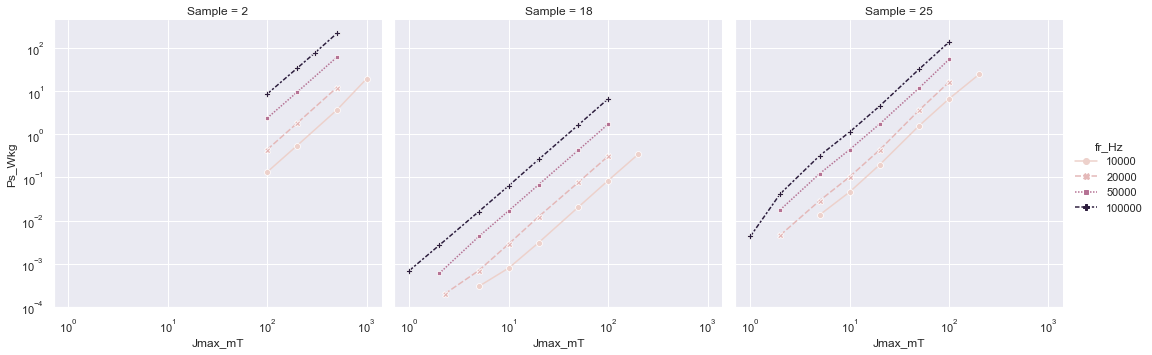

In [190]:
plt.figure(figsize=(6,6))
sns.set()

sns.relplot(
    data=data[(data.Sample == 2) | (data.Sample == 18)| (data.Sample == 25)],
    x="Jmax_mT", y="Ps_Wkg", col="Sample", kind="line", 
    hue="fr_Hz", linestyle="dashed", markers = True, style= "fr_Hz"
    )
plt.xscale('log')
plt.yscale('log')
plt.show()
# Figure01


In [ ]:
# Itt három minta Jmax és Ps összefüggését látjuk log-log skálán. Egyenlőre csak a vizuális információra támaszkodva elmondhatjuk,  
#   hogy többnyire jó közelítéssel monomiális összefüggés figyelhető meg a két változó között.

In [ ]:
# Ha a monomunkat felírjuk ebben a formában: 
#                                               Ps(Jmax)= p•Jmax^k / log() ,
# akkor a helyettesítést követően kapjuk:
#                                                       Y = k•X + q .
# Helyettesítés: X= log(Jmax), Y= log(Ps) q= log(p).
# Látható, hogy a log-log ábrán a meredekség (azaz a k kitevő) szinte állandó, egyedül a q érték növekszik a frekvenciával

<Figure size 612x612 with 0 Axes>

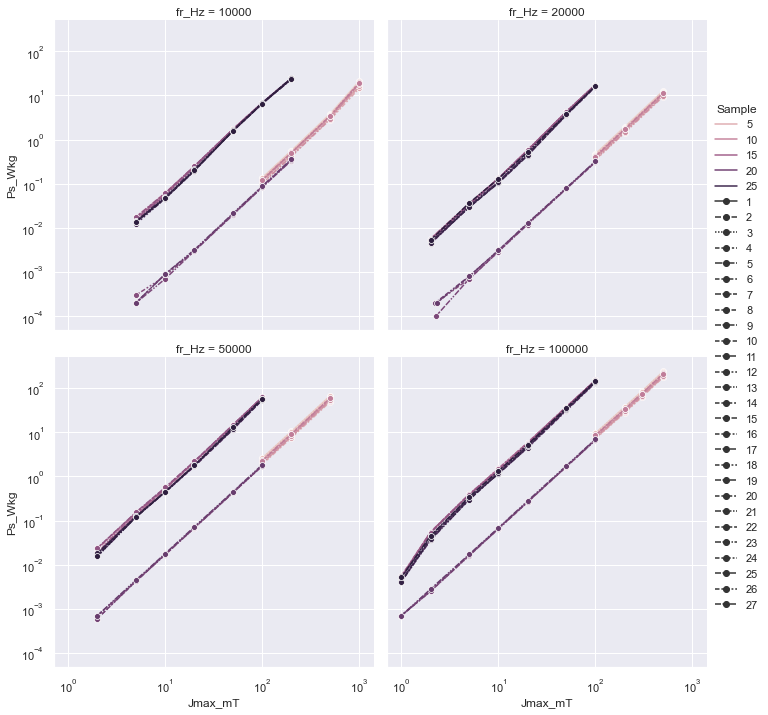

In [225]:
sns.set()
plt.figure(figsize=(8.5,8.5))
sns.relplot(
    data=data,
    x="Jmax_mT", y="Ps_Wkg", col="fr_Hz", kind="line", col_wrap=2,
    hue="Sample", markers= ["o"]*27, legend=True, style= "Sample"
    )

plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
# Itt minden mintaelem ábrázolva van Jmax és Ps log-log skáláján, a négy különböző frekvenciatartományon. 
# Az előbbiekben megállapított jelenség itt is szépen mutatkozik, a frekvenciával a mérési pontjaink is "emelkednek". Illetve ezek az
#   emelkedések nem egyforma mértékben történnekk, a fölső és alsó csoportosulás közti különbség csökken a frekvencia növelésével.
# Megfigyelhető, hogy 3 vagy 2 csoportosulás van jelen, az értelmezési tartomány csupán 10 kHz-nél mutat fedést, 
#   itt mondhatni elkülönül a 3 csoport, a többi esetben nem állapítható meg, hogy 2 vagy 3 csoportosulásról van e szó.
# 100 kHz-nél jól kivehető, hogy a 'bal fölső' csoportosulásban a kicsi Ps értékeknél egy törés (csak itt lett mértek ezen a Jmax tartományon).
# Valószínűleg nem mérési hiba eredménye, mivel az alatta lévő csoportban (kisebb értékek) szinte tökéletesen illeszkednek egyenesre, 
#   illetve konzisztensen követik egymást a törések.
# Valszínűsíthető hogy az ide tartozó alkatrészeknek csupán ilyen a karakterisztikája. (esetleg a mérőműszer ezen a tartományon téveszt
#   konzisztensen, bár ez számomra nehezen elképzelhető...) 
# Érdekes még, hogy nagyjából a meredekségek is megegyeznek, tehát az alkatrészek Jmax-Ps függése csak az együtthatóba tér el.

In [ ]:
#----- Klaszterezés -----#

# A korábbi megállapítás alapján csak a 10 kHz-es mérési tartományok elemeti klaszterezzzük.

#   Metrika meghatározása:
#       A csoportosulásainkat jól jellemzi az értelmezési tartomány és értékkészlet (Ps és Jmax), ezt fogjuk használni metrikaként.

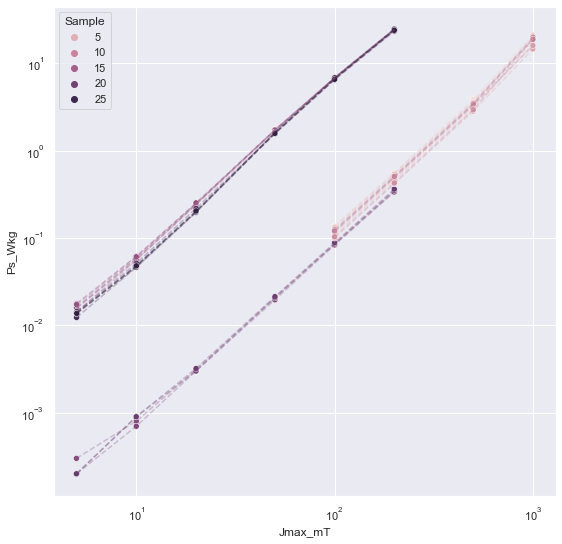

In [10]:
# mivel 10 kHz-nél történt átfedés, ellenőrizzük ezt:
plt.figure(figsize=(9,9))
sns.set()
sns.scatterplot(x="Jmax_mT", y="Ps_Wkg", data=data[data.fr_Hz == 10000], hue="Sample")
sns.lineplot(x="Jmax_mT", y="Ps_Wkg", data=data[data.fr_Hz == 10000], hue="Sample", legend=False, linestyle="dashed",alpha  = 0.3)
plt.xscale('log')
plt.yscale('log')


In [249]:
ndx = pd.unique(data.sort_values("Sample")["Sample"]) # lista 1-től 27-ig, csak az általánosíthatóság miatt maradt ebben a formában
lst = []
for i in ndx:
    
    lst.append(data[(data.Sample == i) & (data.fr_Hz == 10000)]["Jmax_mT"].mean()) 

mean1_df = pd.DataFrame({"Sample":ndx, "mean_Jmax":lst })
mean1_df.set_index('Sample', inplace=True)

lst2 = []
for i in ndx:
    
    lst2.append(data[(data.Sample == i) & (data.fr_Hz == 10000)]["Ps_Wkg"].mean())

mean2_df = pd.DataFrame({"Sample":ndx, "mean_Ps":lst2 })
mean2_df.set_index('Sample', inplace=True)
#a két táblázat összekapcsolása:
table1 = mean1_df.copy()
table1["mean_Ps"] = mean2_df.mean_Ps
table1.head()
# mást is legehetett volna használni, pl a határokat, de talán ez volt a legegyszerűbb.

,mean_Jmax,mean_Ps
Sample,,
1,449.9850,6.390575
2,449.9875,5.916725
3,450.0150,5.818675
4,449.9975,5.013425
5,450.0100,4.925775


<AxesSubplot:xlabel='mean_Jmax', ylabel='mean_Ps'>

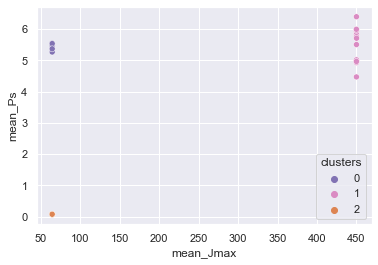

In [55]:
# K-mean klaszteretést vettük igénybe, nincs nagy jelentőssége, bármilyen klasszifikáció megtette volna.
clstr = KMeans(3).fit(table1).labels_
table1["clusters"]=clstr
sns.scatterplot(data=table1, x='mean_Jmax', y='mean_Ps', hue='clusters', palette=["C4", "C6", "C1"])

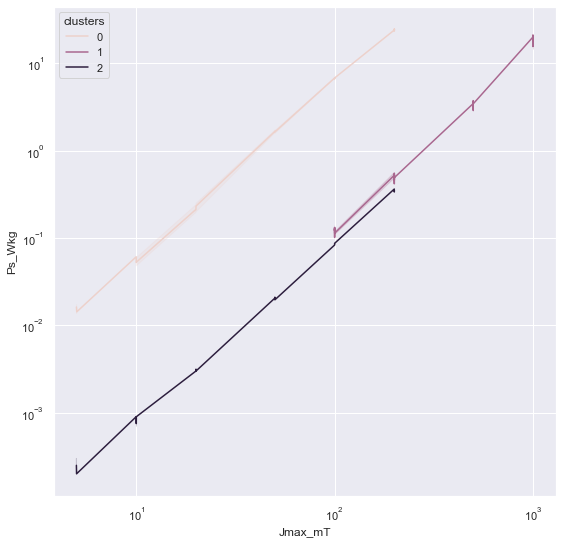

In [56]:
data_cl = data.merge(table1["clusters"], left_on="Sample", right_on="Sample") # az eredeti adatokhoz hozzákapcsoljuk a klasztereket

plt.figure(figsize=(9,9))

sns.lineplot(x="Jmax_mT", y="Ps_Wkg", data=data_cl[data_cl.fr_Hz == 10000], hue="clusters")

plt.xscale('log')
plt.yscale('log')

In [ ]:
# Megfogalmazható a feltételezés, hogy a három klasztert kettő vagy három fajta alkatrész alkotja. Ha a továbbiakban élünk 
#   ezzel a feltételezéssel az jelentőssen megkönnyíti a további munkánkat. 
# Ezen feltétezés ellenőrzésére megvizsgáljuk  adott klaszter, frekcencia és Jmax értékek mellett a Ps értékek tartományát (max-min)
# 

In [57]:
table2=data_cl.copy()
table2.Jmax_mT = table2.Jmax_mT.round() # Jmax a legközelebbi egész értékhez kerekítve, hogy kategóriaválozó ként lehessen használni
pd.unique(table2.Jmax_mT)

array([   1.,    2.,    5.,   10.,   20.,   50.,  100.,  200.,  300.,
        500., 1000.])

In [266]:
lst_cl=[]
for k in range(3):
    for i in (10**4,2*10**4,5*10**4,10**5):
        jmax = np.unique(table2[(table2.clusters == k)&(table2.fr_Hz == i)]["Jmax_mT"])
        for j in jmax:
            dif=table2[(table2.clusters == k)&(table2.fr_Hz == i)&(table2.Jmax_mT == j)]["Ps_Wkg"]
            lst_cl.append([k,i,j,dif.max()-dif.min()])

table0=pd.DataFrame(lst_cl, columns=["clusters","fr_Hz","Jmax_mT","Differencia_Ps"])

In [267]:
table0

,clusters,fr_Hz,Jmax_mT,Differencia_Ps
0,0,10000,5.0,0.0055
1,0,10000,10.0,0.0155
2,0,10000,20.0,0.0561
3,0,10000,50.0,0.1636
4,0,10000,100.0,0.3641
...,...,...,...,...
59,2,100000,5.0,0.0012
60,2,100000,10.0,0.0039
61,2,100000,20.0,0.0153
62,2,100000,50.0,0.0894


<Figure size 612x612 with 0 Axes>

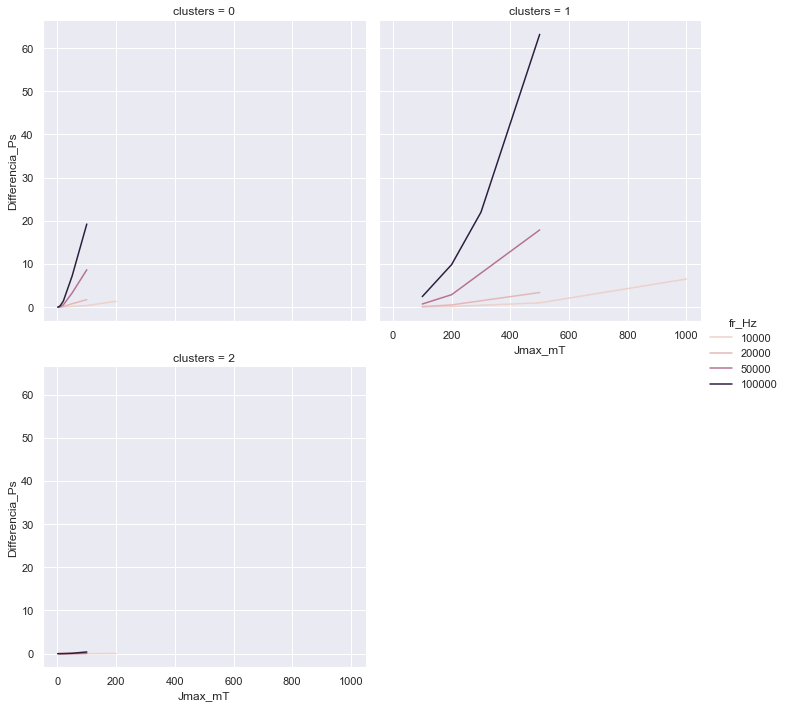

In [269]:
plt.figure(figsize=(8.5,8.5))
sns.relplot(
    data=table0,
    x="Jmax_mT", y="Differencia_Ps", col="clusters", kind="line", col_wrap=2,
    hue="fr_Hz", markers= True, legend=True
    )
plt.show()

In [598]:
lst_norm=[]
for k in range(3):
    for i in (10**4,2*10**4,5*10**4,10**5):
        jmax = np.unique(table2[(table2.clusters == k)&(table2.fr_Hz == i)]["Jmax_mT"])
        for j in jmax:
            dif=table2[(table2.clusters == k)&(table2.fr_Hz == i)&(table2.Jmax_mT == j)]["Ps_Wkg"]
            lst_norm.append((dif.max()-dif.min())/j) # normálás: a különbség a szóbanforgó Jmax értékkel le van osztva.
                                                     # (Jmax növekvésével nagyobb szórást engedünk meg !csak feltételezés!)


stats.describe(lst_norm)

DescribeResult(nobs=64, minmax=(0.0, 0.19250599999999993), mean=0.0172428296875, variance=0.0013487353146567234, skewness=3.02060793725181, kurtosis=9.35283698884328)

In [ ]:
# Nagyobb, néhány-tíz nagyságú eltérés a 0 és 1 klaszterek esetén van, az is csak a magasabb frekvenciatartományokban,  
#   illetve a 'normált' értékek meglehetőssen kicsik maradtak, 0.017 várható értékkel és 0.001 szórással.
# Ezek alapján nagyobb bizonyosságot nyert az a feltételezés hogy a klasztereink egy-egy fajta passzív induktív alkatrészt reprezentálnak.
# Az előzőekben többnyire vizuális alapon vizsgáltuk az adatainkat.
# A megszerzett infromációk alapján tovább haladhatunk az analítukisabb vizsgálatok felé. 
# Egészen pontosan a regressió felé:

In [148]:
#----- Lineáris regresszió -----#

param=[]
for i in range(3):
    for k in (10**4,2*10**4,5*10**4,10**5):
        data_ = data_cl[(data_cl.Jmax_mT < 999)&(data_cl.Jmax_mT > 1.01)] # kiszűrtük a már korábban megállpított "töréseket"
        dt= data_[(data_.clusters == i)&(data_.fr_Hz == k)]
        x=np.array(dt["Jmax_mT"]).reshape((-1, 1))
        y=np.array(dt["Ps_Wkg"])
        model = LinearRegression().fit(np.log10(x), np.log10(y)) 
        param.append([i, k, model.coef_[0], 10**model.intercept_, model.score(np.log10(x), np.log10(y))])

In [149]:
result=pd.DataFrame(param, columns=["clusters","fr_Hz","k","p","R^2"])
result

,clusters,fr_Hz,k,p,R^2
0,0,10000,2.038394,0.000525,0.998474
1,0,20000,2.076193,0.001125,0.998495
2,0,50000,2.040987,0.004592,0.998338
3,0,100000,2.038939,0.011962,0.998288
4,1,10000,2.066966,0.000009,0.995278
5,1,20000,2.052770,0.000032,0.995139
6,1,50000,2.019553,0.000201,0.994343
7,1,100000,1.995935,0.000828,0.993336
8,2,10000,2.003802,0.000008,0.998539
9,2,20000,1.999842,0.000031,0.997435


In [ ]:
# Nagy bizonyossággal megmondható, hogy a 'k', azaz a monomunk kitevője 2, illetve a másik paraméter, a szorzótényező pedig a 'p'.

# Haszálva az előzőekben meghatározott képletet: 
#                                               Ps(Jmax)= p•Jmax^k 

# Ami még érdekes lehet s korábban is tettünk rá egy megjegyzést a vizuális vizsgálat során az a 'p' és a frekvencia függése.

In [187]:
def Ps(J,fr,cls):
    p = np.array(result[(result.clusters == cls)&(result.fr_Hz == fr)]['p'])[0]
    return (p * J**2)


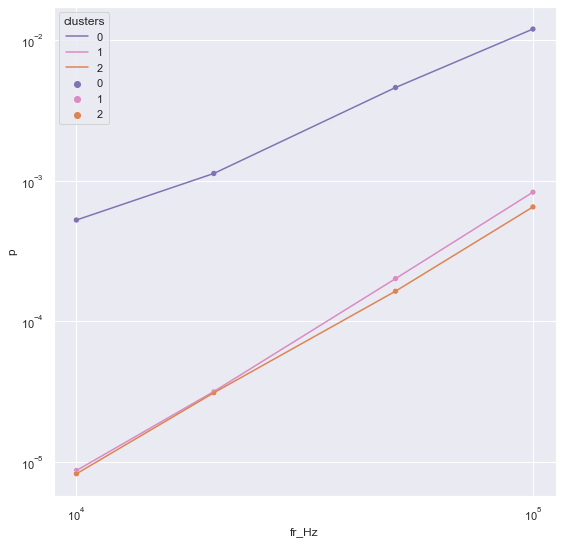

In [164]:
plt.figure(figsize=(9,9))
sns.set()
sns.lineplot(data=result,x="fr_Hz",y="p", hue="clusters",  palette=["C4", "C6", "C1"])
sns.scatterplot(data=result,x="fr_Hz",y="p", hue="clusters",  palette=["C4", "C6", "C1"])
plt.xscale('log')
plt.yscale('log')



In [695]:
# Igen kevés pontra támaszkodhatunk, de úgy tűnik itt is valamilyen hatványkitevős összefüggéssel állunk szemben, 
#   legalább is 'p'(az eredeti kifejezésünk együtthatója) és a frekvencia között. (Ugyebár a q logaritmizálva van már). A kifejezésünk:

#                                               p(fr) = a • fr^b  //  log() ,

#                                                   q(fr) = b•fr + c 
#   ahol: c = log(a), q(fr) = log(p(fr))
# 
# Így az általános összefügg és a Ps, Jmax és a frekvencia között a mérési adatok alapján:

#                 ------------->>>              Ps(Jmax, fr) = a • fr^b • Jmax^2              <<<-------------

In [159]:
p_fr=[]
for i in range(3):
    dt= result[(result.clusters == i)]
    xp=np.array(dt["fr_Hz"]).reshape((-1, 1))
    yp=np.array(dt["p"])
    model2 = LinearRegression().fit(np.log10(xp), np.log10(yp)) 
    p_fr.append([i, model2.coef_[0], 10**(model2.intercept_), model2.score(np.log10(xp), np.log10(yp))])

result_p_fr=pd.DataFrame(p_fr, columns=["clusters","b","a","R^2"])
result_p_fr #ezen adatokkal pedig megadhatók az egyes alkatrészeket leíró egyenletek

,clusters,b,a,R^2
0,0,1.381763,1.445040e-09,0.996445
1,1,1.983900,9.728589e-14,0.999651
2,2,1.885534,2.366775e-13,0.999710


In [180]:
# Végül, de nem utolsó sorban  a Ps függése a Jmax-tól és a frekvenciától, a megfelelő paraméterek mellett:
def Ps_fr(J,fr,cls):
    a = np.array(result_p_fr[(result_p_fr.clusters == cls)]['a'])[0]
    b = np.array(result_p_fr[(result_p_fr.clusters == cls)]['b'])[0]

    return (a *(fr**b)*(J**2))

Text(0.5, 1.0, '0. cluster')

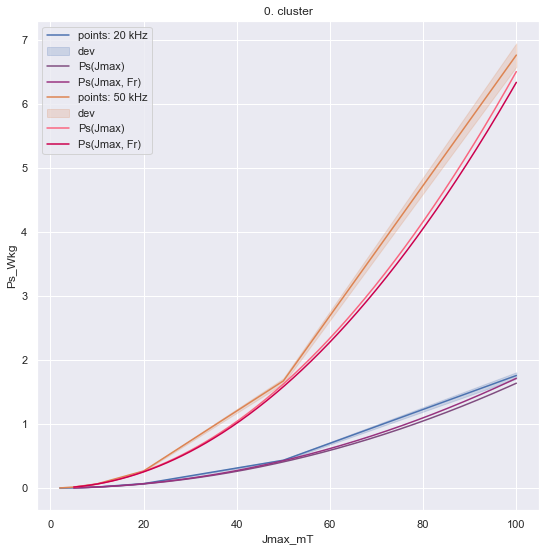

In [272]:
j= np.linspace(5, 100, 400)
f = [10**4, 2*10**4, 5*10**4, 10**5]
plt.figure(figsize=(9,9))

sns.lineplot(
    x="Jmax_mT", y="Ps_Wkg", ci="sd",
    data=table2[(table2.fr_Hz == f[2])&(table2.clusters == 2)&(table2.Jmax_mT < 999)&(table2.Jmax_mT > 1.01)]
    )

plt.plot(j, Ps(j,f[2],2), c =(0.5, 0.3, 0.5))
plt.plot(j, Ps_fr(j,f[2],2), c =(0.6, 0.2, 0.5))

sns.lineplot(
    x="Jmax_mT", y="Ps_Wkg", ci="sd",
    data=table2[(table2.fr_Hz == f[3])&(table2.clusters == 2)&(table2.Jmax_mT < 999)&(table2.Jmax_mT > 1.01)]
    )

plt.plot(j, Ps(j,f[3],2), c =(0.98, 0.4, 0.5))
plt.plot(j, Ps_fr(j,f[3],2), c =(0.8, 0.0, 0.3))
plt.legend(['points: 20 kHz','dev','Ps(Jmax)','Ps(Jmax, Fr)','points: 50 kHz','dev','Ps(Jmax)','Ps(Jmax, Fr)'])
plt.title("0. cluster")


In [ ]:
# Persze nem mindenhol sikerült szép illesztést végrehajtani:

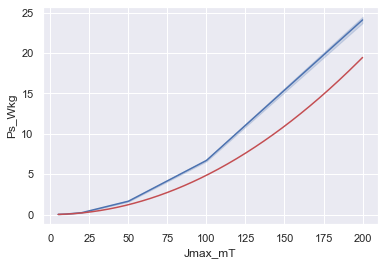

In [188]:
j1= np.linspace(5, 200, 400)

sns.lineplot(
    x="Jmax_mT", y="Ps_Wkg",
    data=table2[(table2.fr_Hz == 10000)&(table2.clusters == 0)&(table2.Jmax_mT < 999)&(table2.Jmax_mT > 1.01)],

    ci="sd"
    )
plt.plot(j1, Ps_fr(j1,10000,0), c ='r', label ='estimate')


In [247]:
lst_mean=[]
for k in range(3):
    for i in (10**4,2*10**4,5*10**4,10**5):
        jmax = np.unique(table2[(table2.clusters == k)&(table2.fr_Hz == i)]["Jmax_mT"])

        for j in jmax:
            dif=table2[(table2.clusters == k)&(table2.fr_Hz == i)&(table2.Jmax_mT == j)]["Ps_Wkg"]
            lst_mean.append([
                k,i,j, dif.mean(), 
                 np.abs(dif.mean()-Ps(dif.mean(),i,k)),np.abs(dif.mean()-Ps_fr(dif.mean(),i,k))
                ])
table3 = pd.DataFrame(lst_mean, columns=["clusters","fr_Hz","Jmax_mT",'Ps_mean','error_Ps(Jmax)','error_Ps(Jmax,fr)'])
table3.head() 
# Ebben a táblázatban összehasonlíthatjuk a a modelljeink eltérését a mért adatoktól (Ps(Jmax) és Ps(Jmax, fr) között nincs nagy eltérés)

,clusters,fr_Hz,Jmax_mT,Ps_mean,error_Ps(Jmax),"error_Ps(Jmax,fr)"
0,0,10000,5.0,0.014925,0.014925,0.014925
1,0,10000,10.0,0.053217,0.053215,0.053215
2,0,10000,20.0,0.223892,0.223865,0.223867
3,0,10000,50.0,1.649617,1.648188,1.648293
4,0,10000,100.0,6.697767,6.674210,6.675950


<Figure size 612x612 with 0 Axes>

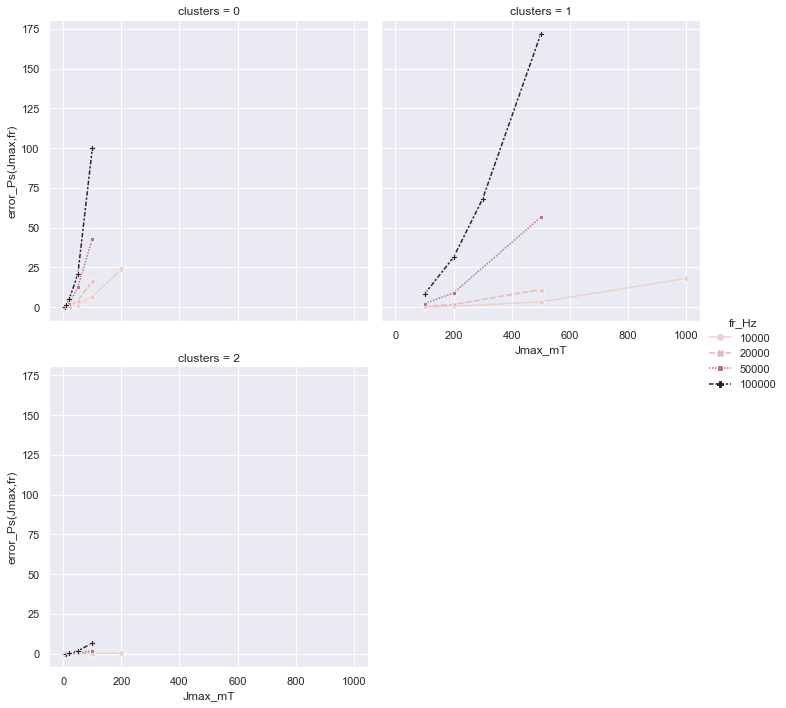

In [246]:
sns.set()
plt.figure(figsize=(8.5,8.5))
sns.relplot(
    data=table3,
    x="Jmax_mT", y="error_Ps(Jmax,fr)", col="clusters", kind="line", col_wrap=2,
    hue="fr_Hz", markers= True, legend=True, style= "fr_Hz"
    )

plt.show()

In [ ]:
# #----- Összefoglaló és konklúzió -----# 
 
# Az első fejezetben az adatokról vizuális módszerek segítségével megállapítottunk pár olyan kulcs kérdést, 
#   mint a minták csoporosulása (klaszterek, esetleges alkatrész típusok), az összefüggés lehetséges monomiális alakja,
#   illetve a vizuálisan megállapított "hibák" megkérdőjelezhetősége. 
# Vizsgáltuk a klaszterezés létjogosultságát, ahol azt találtuk (Jmax-hoz viszonyítás), hogy lehetséges elvégezni a klaszterezést,
#   s ezek után a meghatározott klaszterekkel végeztük a számításokat. 
# Ezek után elvégeztük a lineáris regressziót, amiből meg tudtuk állapítani a klasztereinket jellemző paramétereket. 
# Majd az összefüggéseket tovább bontva megkaptuk a Ps függését nem csak a Jmax-tól, hanem a frekvenciától is.

# További lehetőségek:
# Még érdekes lehet a hibák összefüggése is a frekvenciával a Jmax-al, illetve a többi paraméterrel.
# A hibák egyik forrása lehet, hogy valójában nem monomiális az összefüggés, hanem polinomiális, így az egyik lnehetséges javítása
#   a modelljeinknek, hogy nem a logaritmizált és csoportosított adatatokra végzünk lineáris regressziót, hanem minden egyes 
#   'sample'-re készítünk polinomilleszést, esetleg az így kapott paramétereket vizsgáljuk.